In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, Binarizer 
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as ms
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_breast_cancer

### RandomForest (Bagging)
- 장점
    - 앙상블방식의 알고리즘 중 수행속도가 빠르다.
    - 다양한 데이터세트에서의 좋은 성능
---
- 단점
    - 튜닝을 위한 시간이 오래걸린다.

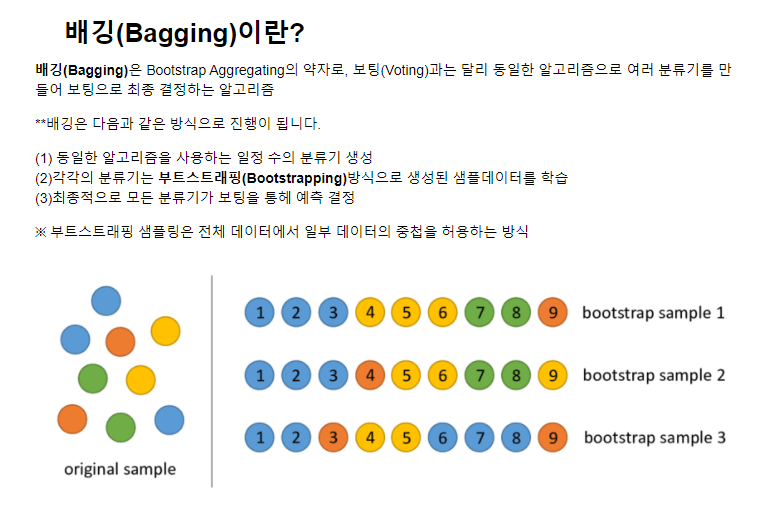

In [21]:
from IPython.display import Image
Image('./images/rf-01.png')

In [45]:
# 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백문자를 sep으로 할당
feature_name_df = pd.read_csv('./data/features.txt', sep = '\s+', header = None, names = ['column_index', 'column_name'])
# display(feature_name_df)
    
# 데이터프레임에 피처명을 컬럼으로 뷰여하기 위해 리스트 객체로 다시 반환
feature_name = feature_name_df.iloc[:, 1].values.tolist()
# print(feature_name)

In [46]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [47]:
# 중복 피처에 대한 에러처리 구문
new_feature_name_df = get_new_feature_name_df(feature_name_df)
new_feature_name_df.head()

,column_index,column_name,dup_cnt
0,1,tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y,0
2,3,tBodyAcc-mean()-Z,0
3,4,tBodyAcc-std()-X,0
4,5,tBodyAcc-std()-Y,0


In [48]:
X_train=pd.read_csv('./data/train/X_train.txt', sep = '\s+', header = None, names = feature_name)
X_test = pd.read_csv('./data/test/X_test.txt', sep = '\s+', header = None, names = feature_name)

# 학습 레이블과 테스트 레이블 데이터를 데이터 프레임으로 로딩, 컬럼명은 action으로 부여
y_train = pd.read_csv('./data/train/y_train.txt', sep = '\s+', names = ['action'])
y_test = pd.read_csv('./data/test/y_test.txt', sep = '\s+', names = ['action'])

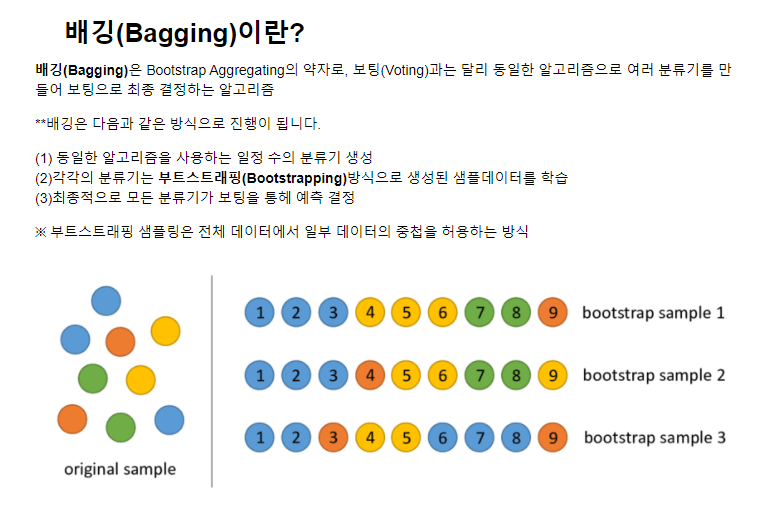

In [22]:
from IPython.display import Image
Image('./images/rf-01.png')

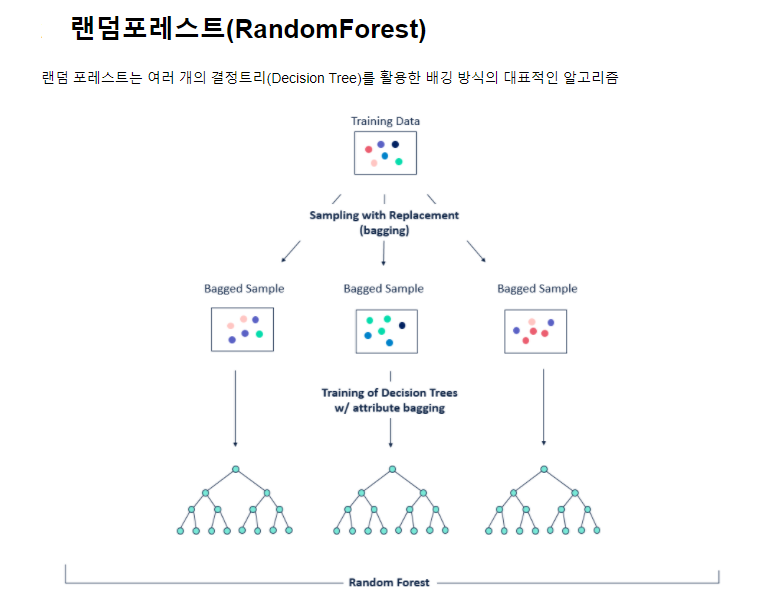

In [23]:
Image('./images/rf-02.png')

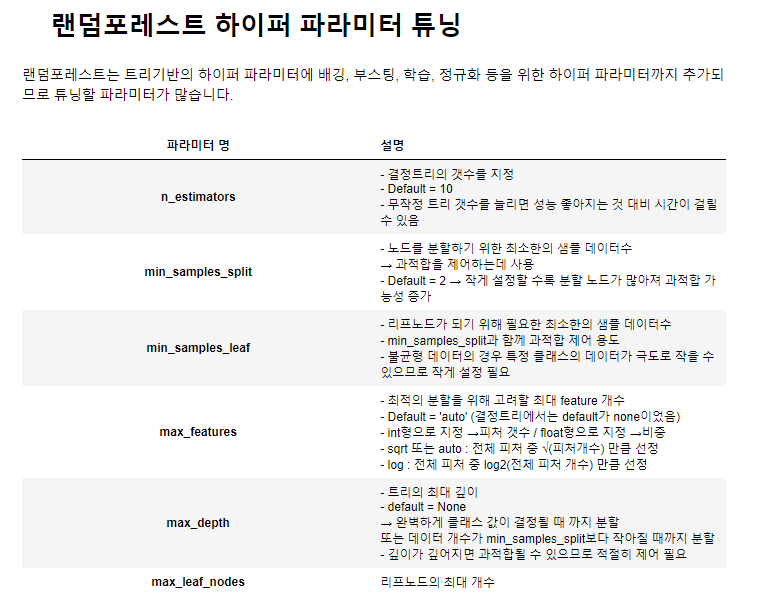

In [25]:
Image('./images/rf-03.png')

In [49]:
# 랜덤포레스트 알고리즘을 이용한 학습, 예측, 평가
rf_model = RandomForestClassifier(random_state = 0)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# print('answer :', y_test)
# print('guess  :', y_pred)

accuracy = accuracy_score(y_test, y_pred)
print('RF Accuracy :', accuracy)

RF Accuracy : 0.9253478113335596


In [50]:
# GridSearchCV
# 교차검증 및 하이퍼 파라미터 튜닝
params = {
    'n_estimators' : [50],
    'max_depth' : [8, 10, 12, 14, 16],
    'min_samples_leaf' : [6, 8, 10, 12, 14],
    'min_samples_split' : [6, 8, 10, 12, 14]
}

cv_rf_model = RandomForestClassifier(random_state = 0, n_jobs = -1) # n_jobs : 내 pc에 있는 모든 cpu를 내가 쓰겠다. (gpu를 쓸 경우)
grid_cv = GridSearchCV(cv_rf_model, param_grid = params, cv = 5, n_jobs = -1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12, 14, 16],
                         'min_samples_leaf': [6, 8, 10, 12, 14],
                         'min_samples_split': [6, 8, 10, 12, 14],
                         'n_estimators': [50]})

In [51]:
print('최적의 파라미터 :', grid_cv.best_params_)
print('예측 정확도     :', grid_cv.best_score_)

최적의 파라미터 : {'max_depth': 10, 'min_samples_leaf': 12, 'min_samples_split': 6, 'n_estimators': 50}
예측 정확도     : 0.9262823661075579


In [42]:
# 최적의 하이퍼 파라미터를 이용하여 랜덤포레스트를 다시 학습
rf_model02 = RandomForestClassifier(random_state = 0, n_estimators = 50, max_depth = 10, min_samples_leaf = 12, min_samples_split = 6)
rf_model02.fit(X_train, y_train)
y_pred = rf_model02.predict(X_test)

# print('answer :', y_test)
# print('guess  :', y_pred)

accuracy = accuracy_score(y_test, y_pred)
print('RF Accuracy :', accuracy)

RF Accuracy : 0.9229725144214456


[4.07454685e-05 2.39074576e-04 1.19731515e-04 1.74010054e-03
 1.06726501e-04 3.21806729e-04 2.99104196e-03 4.00382089e-04
 3.26314248e-04 1.65037894e-02]


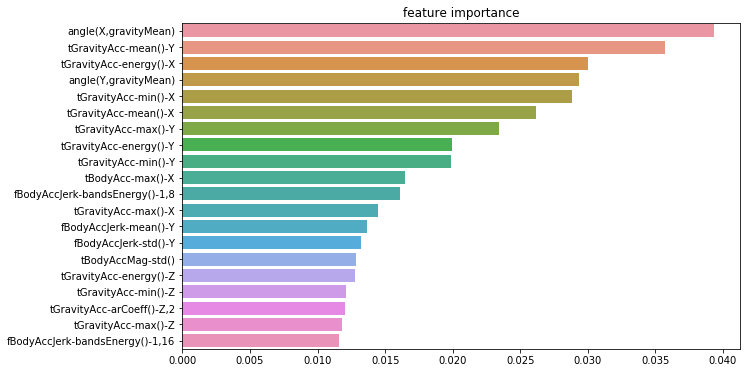

In [44]:
# 각 feature의 중요도를 시각화
print(rf_model02.feature_importances_[:10])

# 피쳐 중요도를 시각화 top20
feature_importances = pd.Series(rf_model02.feature_importances_, index = X_train.columns)

# feature_importances
feature_top20 = feature_importances.sort_values(ascending = False)[:20]
feature_top20

plt.figure(figsize = (10, 6))
plt.title('feature importance')
sns.barplot(x = feature_top20, y = feature_top20.index)

plt.show()